## __Ujian Modul3:__ Hotel Reservation Cancellation Prediction

##### One Masterpiece again by __`Aprian Immanuel`__

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc, f1_score, precision_recall_curve, recall_score, precision_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
#checking shape of dataset
df.shape

(119390, 32)

## __Descriptive Analysis__

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## __Correlation Analysis__

### __1. Customer Profiling__

In [7]:
df1 = df[['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']]
df1 = df1.iloc[:5000]
df1.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


In [8]:
df1['adults'].value_counts()

2     4175
1      654
3      146
0        6
26       5
4        3
27       2
5        2
20       2
55       1
50       1
10       1
6        1
40       1
Name: adults, dtype: int64

#### Kebanyakan tamu kategori dewasa datang berdua.

In [9]:
df1['reserved_room_type'].value_counts()

A    3167
D     847
E     540
G     169
C     109
F     101
H      63
L       3
P       1
Name: reserved_room_type, dtype: int64

#### Tipe kamar yang paling sering dipesan adalah kamar tipe A

In [10]:
df1['hotel'].value_counts()

Resort Hotel    5000
Name: hotel, dtype: int64

#### 5000 baris teratas hanya terisi data `resort hotel`

In [11]:
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

#### Channel distribusi/Channel pemesanan paling banyak melalui channel/jalur Agen Travel atau Operator Perjalanan

In [12]:
df1['babies'].value_counts()

0    4927
1      72
2       1
Name: babies, dtype: int64

#### second insight: Kebanyakan tamu dewasa tidak membawa bayi. Sekalipun membawa bayi, paling banyak hanya satu.

### __2. Customer Behaviour__

In [13]:
df1['country'].value_counts().head()

PRT    3174
ESP     550
GBR     505
IRL     172
FRA     113
Name: country, dtype: int64

#### Tamu yang datang paling banyak dari negara dengan kode 'PRT' dan 'GBR'. 5 negara asal tamu terbanyak adalah negara asal dengan kode 'PRT', 'GBR', 'FRA', 'DEU'

In [14]:
df1[df1['is_canceled'] == 1]['country'].groupby(df['country']).count().sort_values(ascending=False)

country
PRT    2189
ESP      44
GBR      38
CN       13
IRL       5
ITA       3
DEU       3
FRA       2
Name: country, dtype: int64

#### Negara asal tamu yang paling banyak cancel itu adalah negara dengan kode 'PRT', menyusul 'GBR', 'ESP', 'FRA', 'ITA'

In [15]:
df1['market_segment'].value_counts()

Online TA        2156
Groups           1025
Offline TA/TO     929
Direct            618
Corporate         261
Complementary      11
Name: market_segment, dtype: int64

#### kebanyakan tamu melakukan reservasi secara online.

In [16]:
df1['customer_type'].value_counts()

Transient          3699
Transient-Party    1057
Contract            219
Group                25
Name: customer_type, dtype: int64

#### kebanyakan tamu memesan secara pribadi/kepentingan pribadi, tidak terasosisasi dengan grup ataupun kontrak

In [17]:
df1[df1['is_canceled'] == 1]['customer_type'].groupby(df['customer_type']).count().sort_values(ascending=False)

customer_type
Transient          1880
Transient-Party     359
Contract             42
Group                17
Name: customer_type, dtype: int64

#### Pembatalan pemesanan kebanyakan datang dari tipe customer `transient`. Transient adalah pemesanan yang datang tidak terasosiasi dengan grup, kontrak, atau partai(pesan banyak layanan/kamar)

In [18]:
df1[df1['is_canceled'] == 1]['market_segment'].groupby(df['market_segment']).count().sort_values(ascending=False)

market_segment
Online TA        1100
Groups            632
Offline TA/TO     265
Direct            197
Corporate         100
Complementary       4
Name: market_segment, dtype: int64

#### Pembatalan pemesanan kebanyakan datang dari pesanan daring, menyusul pesanan dari grup

In [19]:
df1[df1['is_canceled'] == 1]['deposit_type'].groupby(df['deposit_type']).count().sort_values(ascending=False)

deposit_type
No Deposit    1852
Non Refund     438
Refundable       8
Name: deposit_type, dtype: int64

#### Pembatalan pemesanan/reservasi kebanyakan datang dari tamu yang tidak melakukan deposit.

### __3. Ordinal Encoding__

In [20]:
df2 = df1.copy()
marseg_dict = {'Online TA': 1, 'Groups': 2, 'Offline TA/TO': 3, 'Direct': 4, 'Corporate':5, 'Complementary':6}
df2['market_segment_ord'] = df1['market_segment'].map(marseg_dict)
df2[['market_segment_ord', 'market_segment']]

,market_segment_ord,market_segment
0,4,Direct
1,4,Direct
2,4,Direct
3,5,Corporate
4,1,Online TA
...,...,...
4995,2,Groups
4996,2,Groups
4997,2,Groups
4998,2,Groups


In [21]:
custype_dict = {'Transient': 1, 'Transient-Party': 2, 'Contract': 3, 'Group': 4}
df2['customer_type_ord'] = df1['customer_type'].map(custype_dict)
df2[['customer_type_ord', 'customer_type']]

,customer_type_ord,customer_type
0,1,Transient
1,1,Transient
2,1,Transient
3,1,Transient
4,1,Transient
...,...,...
4995,1,Transient
4996,1,Transient
4997,1,Transient
4998,1,Transient


In [22]:
rumtype_dict = {'A': 1, 'D': 2, 'E': 3, 'G': 4, 'C': 5, 'F': 6, 'H': 7, 'L': 8, 'P': 9}
df2['rum_type_ord'] = df1['reserved_room_type'].map(rumtype_dict)
df2[['rum_type_ord', 'reserved_room_type']]

,rum_type_ord,reserved_room_type
0,5,C
1,5,C
2,1,A
3,1,A
4,1,A
...,...,...
4995,2,D
4996,2,D
4997,1,A
4998,1,A


In [23]:
dischan_dict = {'TA/TO': 1, 'Direct': 2, 'Corporate': 3, 'GDS': 4, 'Undefined': 5}
df2['distribution_channel_ord'] = df1['distribution_channel'].map(dischan_dict)
df2[['distribution_channel_ord', 'distribution_channel']]

,distribution_channel_ord,distribution_channel
0,2,Direct
1,2,Direct
2,2,Direct
3,3,Corporate
4,1,TA/TO
...,...,...
4995,2,Direct
4996,2,Direct
4997,2,Direct
4998,2,Direct


In [24]:
deposit_dict = {'No Deposit': 1, 'Non Refund': 2, 'Refundable': 3}
df2['deposit_ord'] = df1['deposit_type'].map(deposit_dict)
df2[['deposit_ord', 'deposit_type']]

,deposit_ord,deposit_type
0,1,No Deposit
1,1,No Deposit
2,1,No Deposit
3,1,No Deposit
4,1,No Deposit
...,...,...
4995,2,Non Refund
4996,2,Non Refund
4997,2,Non Refund
4998,2,Non Refund


In [25]:
df2 = df2.dropna(axis=0)
df2['country_ord'] = pd.factorize(df2['country'])[0].reshape(-1,1)
df2[['country_ord', 'country']].sort_values(by='country')

,country_ord,country
2242,46,AGO
653,30,ALB
2113,9,ARG
2111,9,ARG
3744,9,ARG
...,...,...
761,2,USA
3448,45,ZAF
2227,45,ZAF
2672,49,ZMB


In [26]:
df2[['country_ord', 'market_segment_ord', 'customer_type_ord', 'rum_type_ord', 'distribution_channel_ord', 'deposit_ord', 'is_canceled']]

,country_ord,market_segment_ord,customer_type_ord,rum_type_ord,distribution_channel_ord,deposit_ord,is_canceled
0,0,4,1,5,2,1,0
1,0,4,1,5,2,1,0
2,1,4,1,1,2,1,0
3,1,5,1,1,3,1,0
4,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...
4995,0,2,1,2,2,2,1
4996,0,2,1,2,2,2,1
4997,0,2,1,1,2,2,1
4998,0,2,1,1,2,2,1


In [27]:
#feature selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif
x = df2[['country_ord', 'market_segment_ord', 'customer_type_ord', 'rum_type_ord', 'distribution_channel_ord', 'deposit_ord']]
y = df2['is_canceled']  

#apply SelectKBest class to extract top 3 best features
bestfeatures = SelectKBest(score_func=f_classif, k=3)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(3,'Score'))  

                Specs       Score
0         country_ord  601.799417
5         deposit_ord  202.813067
1  market_segment_ord  134.811719


## __3. Model Building & Hyperparameter Tuning__
### A. Logistic Regression Before Tuning

In [28]:
x = x.values
y = y.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [29]:
#fitting model
model_LogReg_Asli = LogisticRegression()
model_LogReg_Asli.fit(x, y)

LogisticRegression()

In [30]:
print(model_LogReg_Asli.coef_)
print(model_LogReg_Asli.intercept_)

[[-0.86115698 -0.24745249 -0.35035597 -0.04946306 -0.09563636  1.38474348]]
[0.22805652]


In [31]:
y_pred = model_LogReg_Asli.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77       269
           1       0.72      0.85      0.78       231

    accuracy                           0.78       500
   macro avg       0.78      0.78      0.78       500
weighted avg       0.79      0.78      0.78       500



In [32]:
y_pred = model_LogReg_Asli.predict(x_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred)*100, recall_score(y_test, y_pred)*100, precision_score(y_test, y_pred)*100, roc_auc_score(y_test, y_pred)*100, f1_score(y_test, y_pred)*100],
            index = ['accuracy', 'recall_score', 'precision_score', 'roc_auc_score', 'f1_score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,77.600000
recall_score,84.848485
precision_score,71.794872
roc_auc_score,78.111975
f1_score,77.777778


In [33]:
pd.DataFrame(data=[model_LogReg_Asli.score(x_train, y_train)*100,
                  model_LogReg_Asli.score(x_test, y_test)*100],
            index = ['Model Score in Data Train', 'Model Score in Data Test'],
            columns = ['Score (%)']
            )

,Score (%)
Model Score in Data Train,77.323255
Model Score in Data Test,77.600000


### B. Logistic Regression After Tuning

In [34]:
#parameter model linear regression yang akan dituned + value di setiap parameter
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]
#simpan dalam variable dengan nama 'param'
param = {'penalty': penalty, 'solver': solver, 'max_iter': max_iter}
param

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

In [35]:
# mencari parameter terbaik pada model: Logistic regression

model_LR = LogisticRegression()
model_LR_RS = RandomizedSearchCV(estimator = model_LR, param_distributions = param, cv = 5)

In [36]:
model_LR_RS.fit(x_train, y_train)
model_LR_RS.best_params_

{'solver': 'saga', 'penalty': 'none', 'max_iter': 10}

In [37]:
model_LogReg_RS = LogisticRegression(solver='saga', penalty='l2', max_iter=10)
model_LogReg_RS.fit(x_train, y_train)

LogisticRegression(max_iter=10, solver='saga')

In [38]:
y_pred_RS = model_LogReg_RS.predict(x_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_RS)*100, recall_score(y_test, y_pred_RS)*100, 
                     precision_score(y_test, y_pred_RS)*100, roc_auc_score(y_test, y_pred_RS)*100, 
                     f1_score(y_test, y_pred_RS)*100],
            index = ['accuracy', 'recall_score', 'precision_score', 'roc_auc_score', 'f1_score'],
             columns = ['Score (%)'])

,Score (%)
accuracy,79.400000
recall_score,84.848485
precision_score,74.242424
roc_auc_score,79.784837
f1_score,79.191919


In [39]:
pd.DataFrame(data=[model_LogReg_RS.score(x_train, y_train)*100,
                  model_LogReg_RS.score(x_test, y_test)*100],
            index = ['Model Score in Data Train', 'Model Score in Data Test'],
            columns = ['Score (%)']
            )

,Score (%)
Model Score in Data Train,78.523788
Model Score in Data Test,79.400000


### C. Random Forest Before Tuning

In [40]:
model_RFC = RandomForestClassifier()
model_RFC.fit(x_train, y_train)

RandomForestClassifier()

In [41]:
y_pred_RFC = model_RFC.predict(x_test)
y_pred_RFC

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,

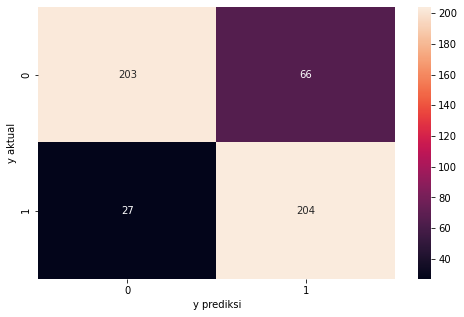

In [42]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_RFC), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y prediksi')
plt.ylabel('y aktual')
plt.show()

In [43]:
# confusion matrix report

print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       269
           1       0.76      0.88      0.81       231

    accuracy                           0.81       500
   macro avg       0.82      0.82      0.81       500
weighted avg       0.82      0.81      0.81       500



In [44]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred_RFC)*100, recall_score(y_test, y_pred_RFC)*100, precision_score(y_test, y_pred_RFC)*100, roc_auc_score(y_test, y_pred_RFC)*100, f1_score(y_test, y_pred_RFC)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,81.400000
recall,88.311688
precision,75.555556
roc_auc_score,81.888186
f1_score,81.437126


In [45]:
pd.DataFrame(data=[model_RFC.score(x_train, y_train)*100,
                  model_RFC.score(x_test, y_test)*100],
            index = ['Model Score in Data Train', 'Model Score in Data Test'],
            columns = ['Score (%)']
            )

,Score (%)
Model Score in Data Train,83.170298
Model Score in Data Test,81.400000


### D. Random Forest After Tuning

In [51]:
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]
n_estimators = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

param = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [52]:
#mencari parameter terbaik untuk model Random Forest Classifier
model_RF = RandomForestClassifier()
model_RF_RS = RandomizedSearchCV(estimator = model_RF, param_distributions = param, cv = 5)

In [53]:
model_RF_RS.fit(x_train, y_train)
model_RF_RS.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [54]:
model_RF_new= RandomForestClassifier(max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=1600
)
model_RF_new.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1600)

In [55]:
# membuat prediksi dan fungsinya untuk mengevaluasi model (dibandingkan dengan y aktual)
y_pred_RF = model_RF_new.predict(x_test)
# jika ingin tahu probability dalam membuat tebakan
y_pred_proba_RF = model_RF_new.predict_proba(x_test)

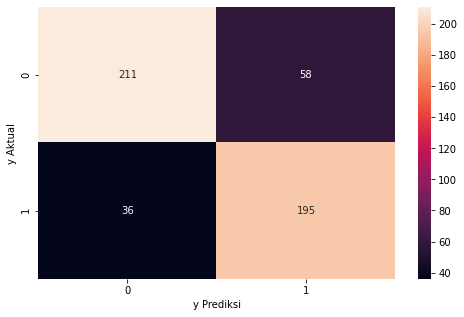

In [56]:
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_RF), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [57]:
# confusion matrix report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82       269
           1       0.77      0.84      0.81       231

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.82      0.81      0.81       500



In [58]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred_RF)*100, recall_score(y_test, y_pred_RF)*100,
                     precision_score(y_test, y_pred_RF)*100, roc_auc_score(y_test, y_pred_RF)*100,
                    f1_score(y_test, y_pred_RF)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1 score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,81.200000
recall,84.415584
precision,77.075099
roc_auc_score,81.427123
f1 score,80.578512


In [59]:
pd.DataFrame(data = [model_RF_new.score(x_train, y_train)*100, 
                     model_RF_new.score(x_test, y_test)*100],
            index = ['Model Score in Data Train', 'Model Score in Data Test'],
            columns = ['Score (%)']
            )

,Score (%)
Model Score in Data Train,83.103602
Model Score in Data Test,81.200000


### E. Decision Tree Classifier Before Tuning

In [61]:
from sklearn.tree import DecisionTreeClassifier
model_DTC = DecisionTreeClassifier()
model_DTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [65]:
y_pred_DTC = model_DTC.predict(x_test)

[Text(2969.6629061371846, 4212.900000000001, 'X[0] <= 0.5\ngini = 0.497\nsamples = 4498\nvalue = [2432, 2066]'),
 Text(1859.0767148014443, 3941.1000000000004, 'X[1] <= 3.5\ngini = 0.428\nsamples = 2854\nvalue = [887, 1967]'),
 Text(1137.1516245487367, 3669.3, 'X[5] <= 1.5\ngini = 0.375\nsamples = 2272\nvalue = [568, 1704]'),
 Text(630.5198555956679, 3397.5, 'X[1] <= 1.5\ngini = 0.408\nsamples = 1903\nvalue = [544, 1359]'),
 Text(257.84837545126356, 3125.7, 'X[2] <= 1.5\ngini = 0.368\nsamples = 1251\nvalue = [304, 947]'),
 Text(128.92418772563178, 2853.9, 'X[3] <= 3.5\ngini = 0.361\nsamples = 1232\nvalue = [291, 941]'),
 Text(64.46209386281589, 2582.1000000000004, 'X[3] <= 1.5\ngini = 0.37\nsamples = 1092\nvalue = [268, 824]'),
 Text(32.231046931407946, 2310.3, 'gini = 0.363\nsamples = 671\nvalue = [160, 511]'),
 Text(96.69314079422384, 2310.3, 'X[3] <= 2.5\ngini = 0.381\nsamples = 421\nvalue = [108, 313]'),
 Text(64.46209386281589, 2038.5, 'gini = 0.384\nsamples = 262\nvalue = [68, 194

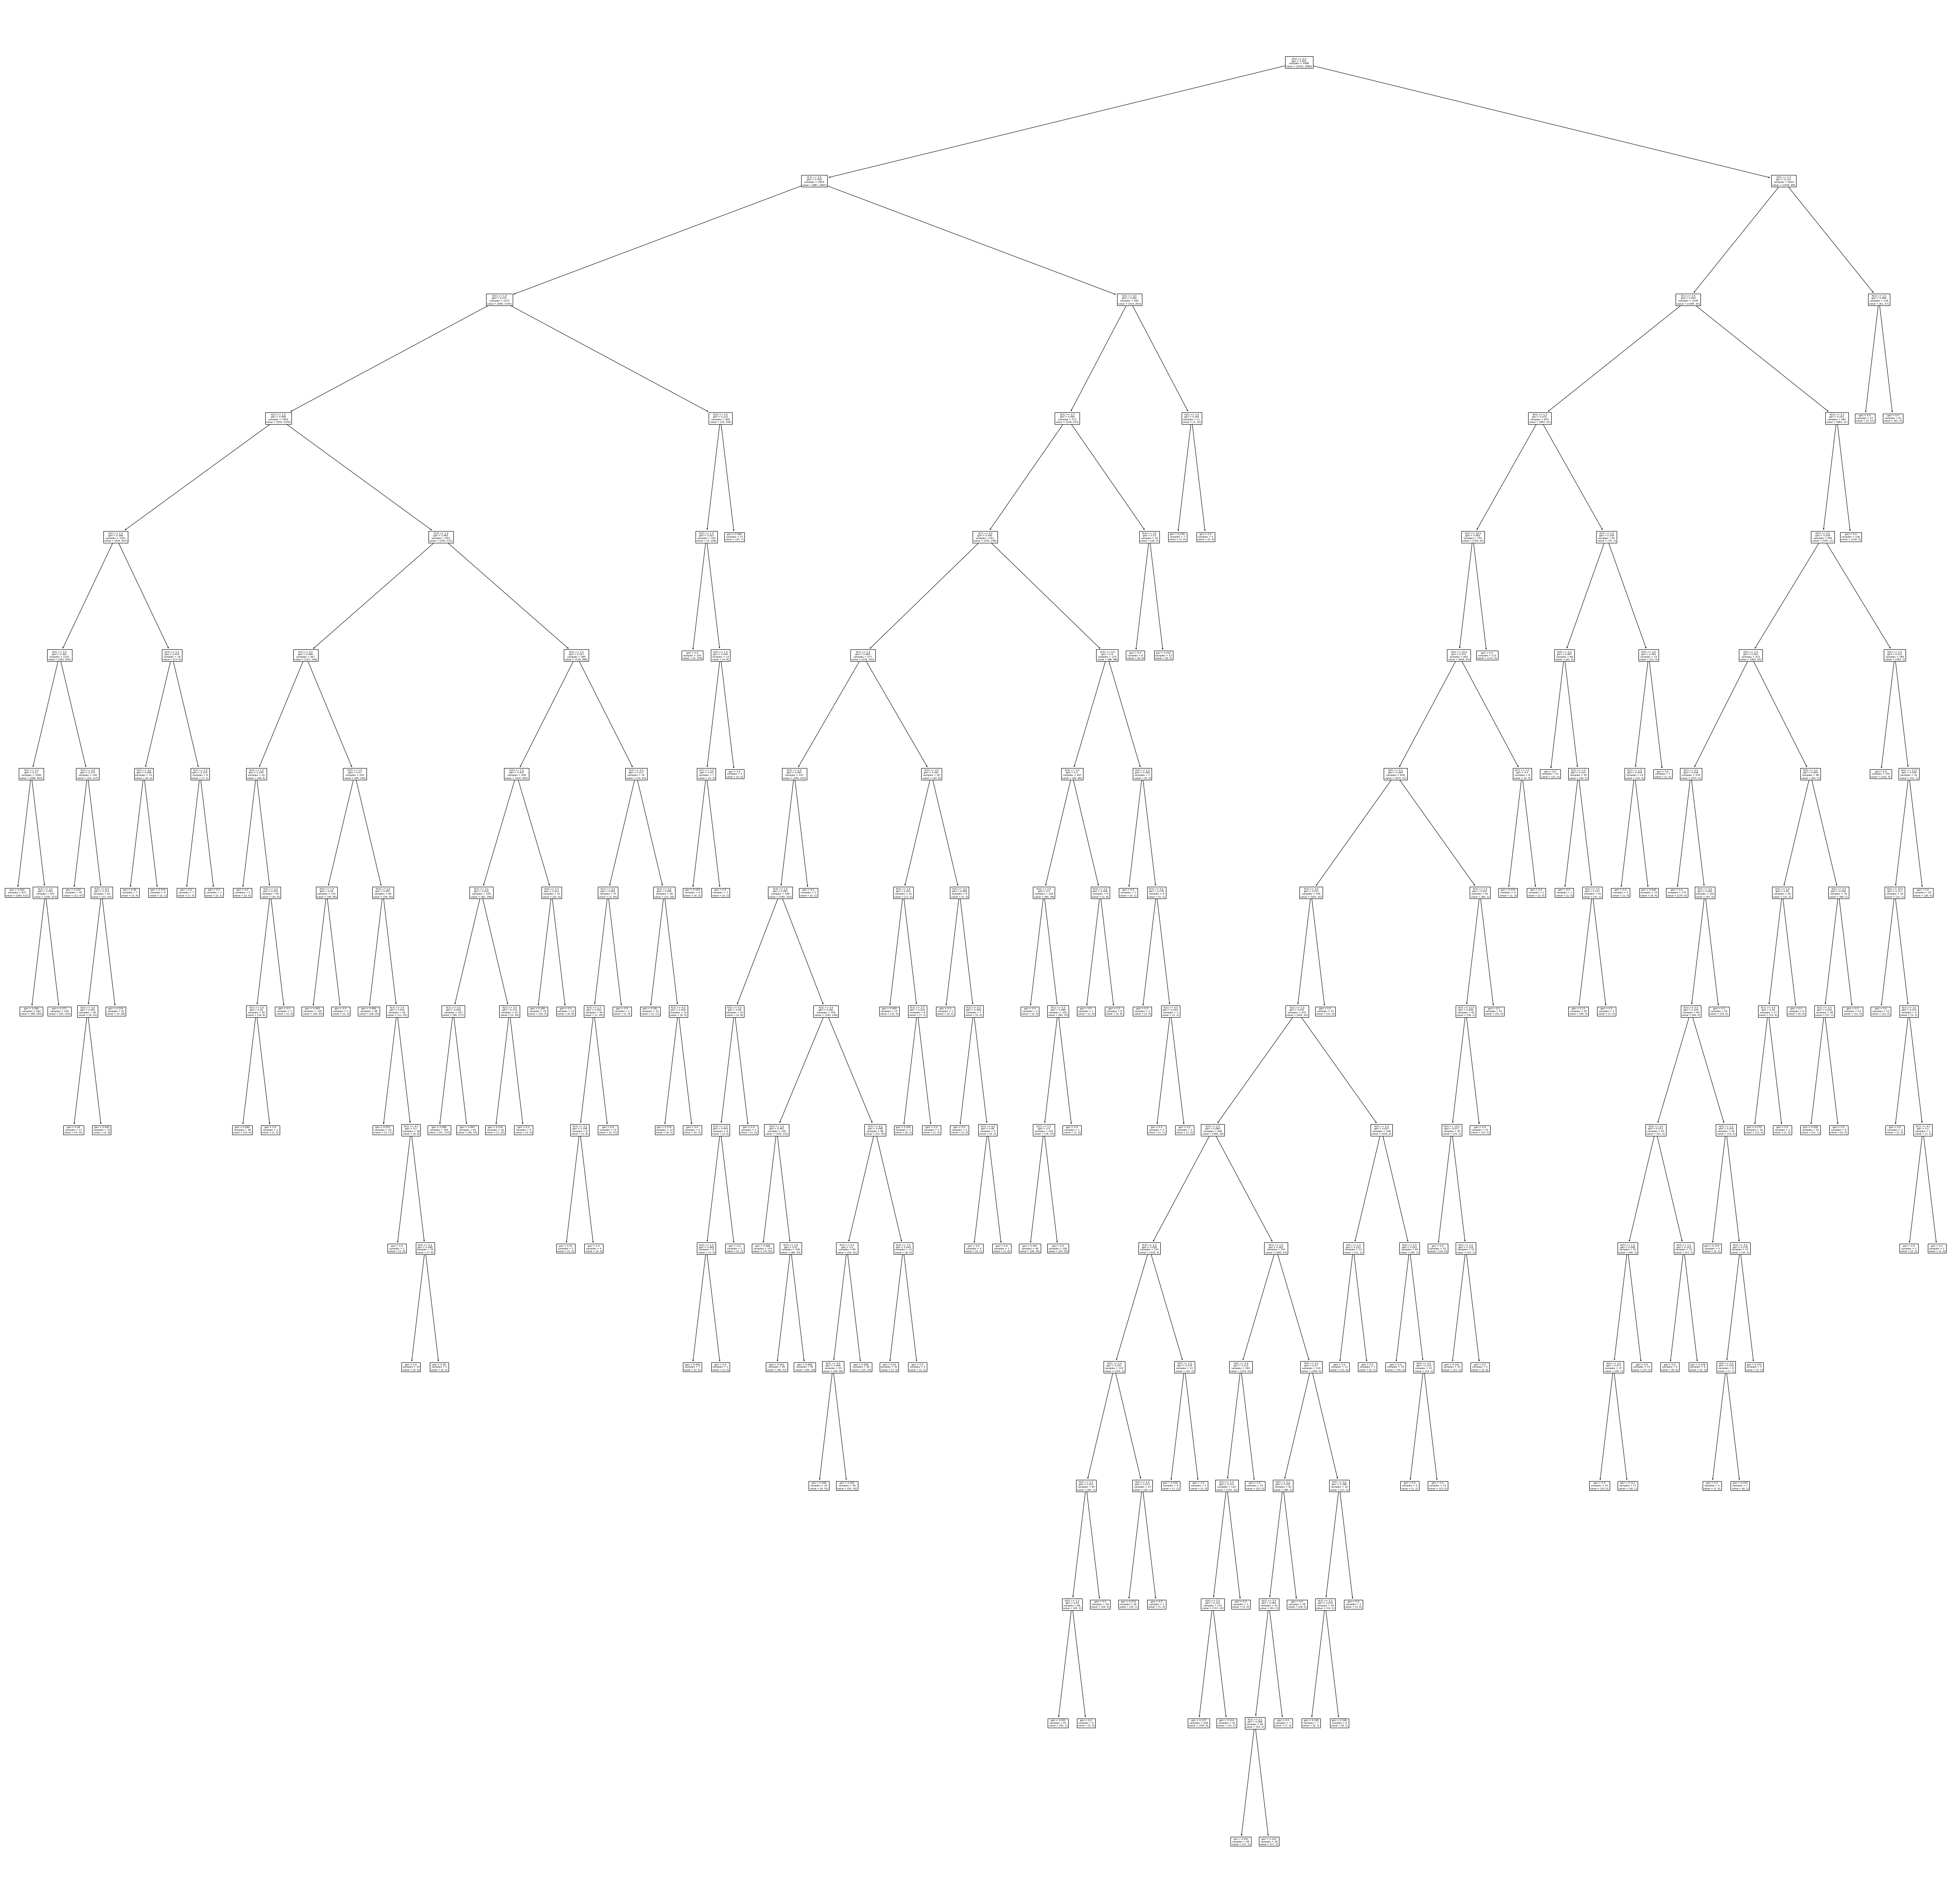

In [64]:
from sklearn import tree
plt.figure(figsize=(80, 80))
tree.plot_tree(model_DTC.fit(x_train, y_train))

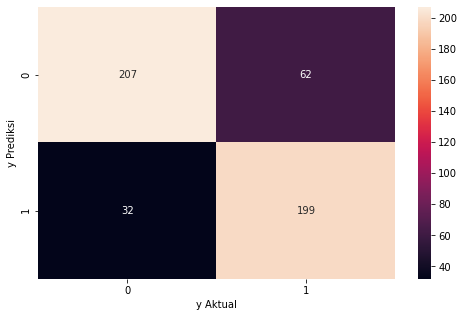

In [66]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_DTC), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Aktual')
plt.ylabel('y Prediksi')
plt.show()

In [67]:
# Confusion matrix report
print(classification_report(y_test, y_pred_DTC))

              precision    recall  f1-score   support

           0       0.87      0.77      0.81       269
           1       0.76      0.86      0.81       231

    accuracy                           0.81       500
   macro avg       0.81      0.82      0.81       500
weighted avg       0.82      0.81      0.81       500



In [68]:
model_DTC.score(x_train, y_train)

0.831702979101823

In [69]:
model_DTC.score(x_test, y_test)

0.812

In [71]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred_DTC)*100, recall_score(y_test, y_pred_DTC)*100, precision_score(y_test, y_pred_DTC)*100, roc_auc_score(y_test, y_pred_DTC)*100, f1_score(y_test, y_pred_DTC)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,81.200000
recall,86.147186
precision,76.245211
roc_auc_score,81.549430
f1_score,80.894309


In [72]:
pd.DataFrame(data=[model_DTC.score(x_train, y_train)*100,
                  model_DTC.score(x_test, y_test)*100],
            index = ['Model Score in Data Train', 'Model Score in Data Test'],
            columns = ['Score (%)']
            )

,Score (%)
Model Score in Data Train,83.170298
Model Score in Data Test,81.200000


### F. Decision Tree After Tuning

In [78]:
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]

param_DTC = {'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
            'criterion': criterion}

In [79]:
#mencari parameter terbaik untuk model Random Forest Classifier
model_DTC = DecisionTreeClassifier()
model_DTC_RS = RandomizedSearchCV(estimator = model_DTC, param_distributions = param_DTC, cv = 5)

In [80]:
model_DTC_RS.fit(x_train, y_train)
model_DTC_RS.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None,
 'criterion': 'gini'}

In [81]:
model_DTC_RS.best_score_

0.8170312693115809

In [84]:
model_DTC_RS = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1, max_depth=None, criterion='gini')
model_DTC_RS.fit(x_train, y_train)

DecisionTreeClassifier()

In [89]:
# membuat prediksi dan fungsinya untuk mengevaluasi model (dibandingkan dengan y aktual)
y_pred_DTC_new = model_DTC_RS.predict(x_test)
# jika ingin tahu probability dalam membuat tebakan
y_pred_proba_DTC = model_DTC_RS.predict_proba(x_test)

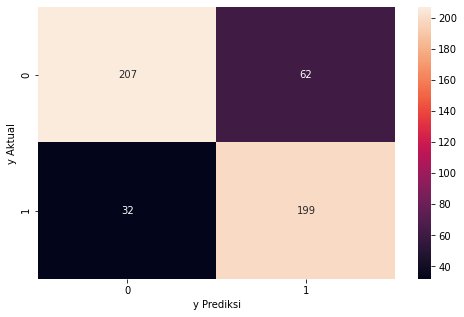

In [90]:
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_DTC_new), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [92]:
# confusion matrix report
print(classification_report(y_test, y_pred_DTC_new))

              precision    recall  f1-score   support

           0       0.87      0.77      0.81       269
           1       0.76      0.86      0.81       231

    accuracy                           0.81       500
   macro avg       0.81      0.82      0.81       500
weighted avg       0.82      0.81      0.81       500



In [93]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred_DTC_new)*100, recall_score(y_test, y_pred_DTC_new)*100,
                     precision_score(y_test, y_pred_DTC_new)*100, roc_auc_score(y_test, y_pred_DTC_new)*100,
                    f1_score(y_test, y_pred_DTC_new)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1 score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,81.200000
recall,86.147186
precision,76.245211
roc_auc_score,81.549430
f1 score,80.894309


In [94]:
pd.DataFrame(data=[model_DTC_RS.score(x_train, y_train)*100,
                  model_DTC_RS.score(x_test, y_test)*100],
            index = ['Model Score in Data Train', 'Model Score in Data Test'],
            columns = ['Score (%)']
            )

,Score (%)
Model Score in Data Train,83.170298
Model Score in Data Test,81.200000


## Kesimpulan:
   ### 1. Evaluation Metrix pada model Random Forest Classifier menunjukan hasil paling baik dengan nilai f1_score tertinggi.
   ### 2. 3 Hal paling berpengaruh terhadap tingkat pembatalan pesanan adalah Negara Asal Tamu, Tipe Deposit, dan Segmentasi Pasar

<hr>